# **Chapter 9 추천 시스템**

### **[개념 정리]**

#### **01 추천 시스템의 개요와 배경**

##### **추천 시스템의 유형**

1. 콘텐츠 기반 필터링 (Content Based filtering) 방식

2. 협업 필터링(Collarborative Filtering) 방식
> 1. 최근접 이웃(Nearest Neighbor) 협업 필터링
> 2. 잠재 요인(Latent Factor) 협업 필터링 

#### **02 콘텐츠 기반 필터링 추천 시스템**

콘텐츠 기반 필터링 방식
> 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

#### **03 최근접 이웃 협업 필터링**

협업 필터링(Collaborative Filtering)
> 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것
>
> <목표> : 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating) 하는 것

1. 최근접 이웃(Nearest Neighbor) 협업 필터링
   - 메모리 협업 필터링이라고도 함
> 1. 사용자 기반(User-User): 당신과 비슷한 고객들이 다음 상품도 구매했습니다.
> - 특정 사용자와 유사한 다른 사용자를 Top-N으로 선정해, 이 Top-N 사용자가 좋아하는 아이템을 추천하는 방식
> - 즉, 특정 사용자와 타 사용자 간의 유사도(Similarity)를 측정한 뒤, 가장 유사도가 높은 Top-N 사용자를 추출해 그들이 선호하는 아이템을 추천하는 것
>  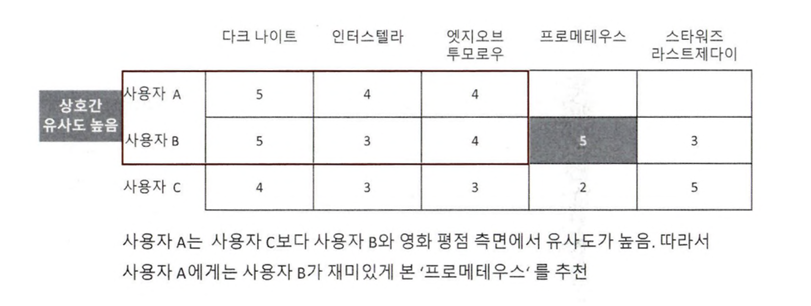
> 2. 아이템 기반(item-item): 이 상품을 선택한 다른 고객들을 다음 상품도 구매했습니다.
> - 아이템이 가지는 속성과는 상관없이, 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘
> 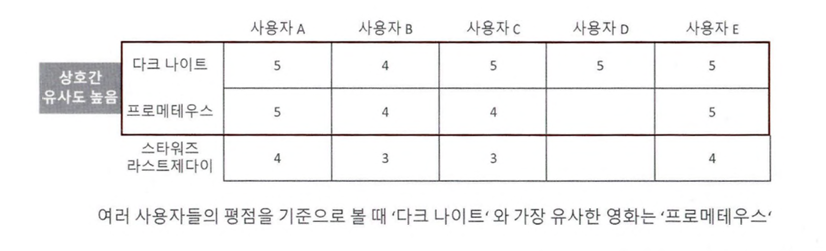
- 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천 수행
    - 행(Row): 개별 사용자
    - 열(Column): 개별 아이템
    - 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬 특성을 가짐
    - 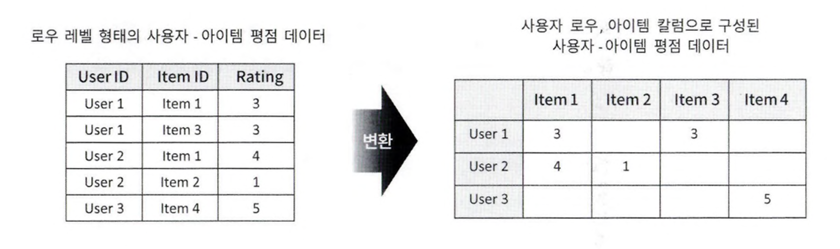

- 일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 높음
> 비슷한 상품을 좋아한다고 해서 람들의 취향이 비슷하다고 판단하기는 어려운 경우가 많기 때문.
> 따라서 최근접 이웃 협업 필터링은 대부분 아이템 기반 알고리즘을 적용

코사인 유사도
- 텍스트 분석뿐만 아니라 추천 시스템의 유사도 측정에 가장 많이 사용됨

#### **04 잠재 요인 협업 필터링**

잠재 요인 협업 필터링
> 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
> 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출 (행렬 분해)

- 다차원 희소 행렬인 사용자-아이템 행렬 데이터
    - 저차원 밀집 행렬의 사용자-잠재 요인 행렬, 아이템-잠재 요인 행렬의 전치 행렬(즉, 잠재 요인-아이템 행렬)로 분해
    > 분해된 두 행렬의 내적 -> 새로운 예측 사용자-아이템 평점 행렬 데이터를 만들어 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성
    > 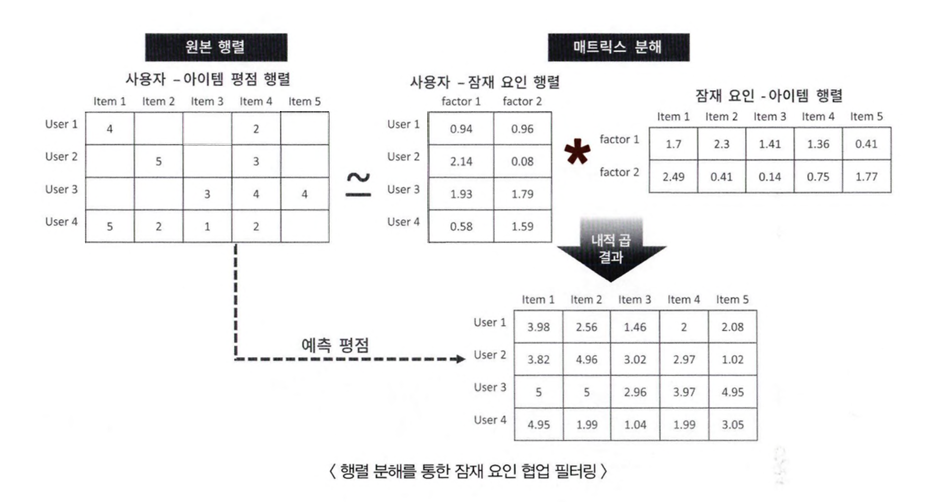

- 잠재 요인이 정확히 어떤 것인지는 알 수 없음
    - 하지만, 영화 평점 기반의 사용자-아이템 평점 행렬 데이터라면 영화가 가지는 장르별 특성 선호도로 가정할 수 있음
    - 즉, 사용자-잠재 요인 행렬은 사용자의 영화 장르에 대한 선호도, 아이템-잠재 요인 행렬은 영화의 장르별 특성값으로 정의

- 행렬 분해
> 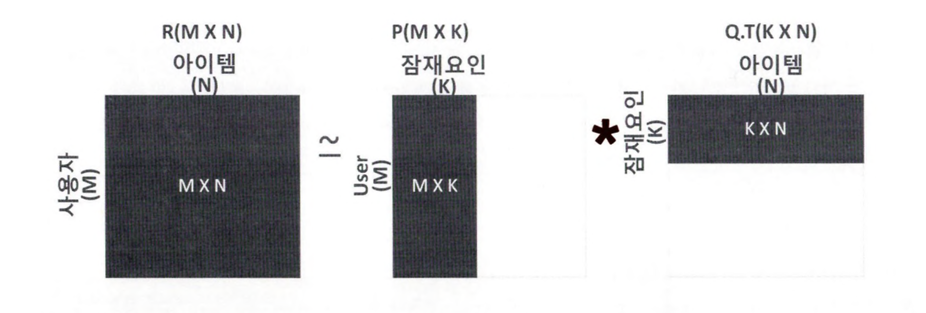
> - M은총사용자수
> - N은 총아이템수
> - K는잠재 요인의차원수
> - R은 M X N 차원의 사용자」아이템 평점 행렬
> - P 는 사용자와 잠재 요인과의 관계 값을 가자는 MXK 차원의 사용자■졷Ml 요인 행렬
> - Q 는 아이템과 잠재 요인과의 관계 값을 가지는 NXK 차원의 아이템一잠재 요인 행렬
> - Q.T는 Q 매트릭스의 행과 열 값을 교환한 전치 행렬

> 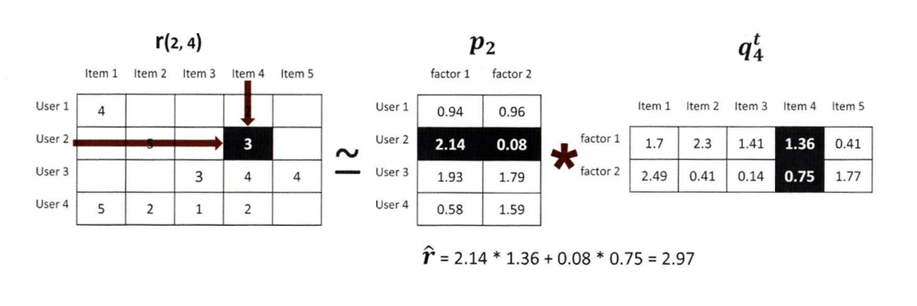
> 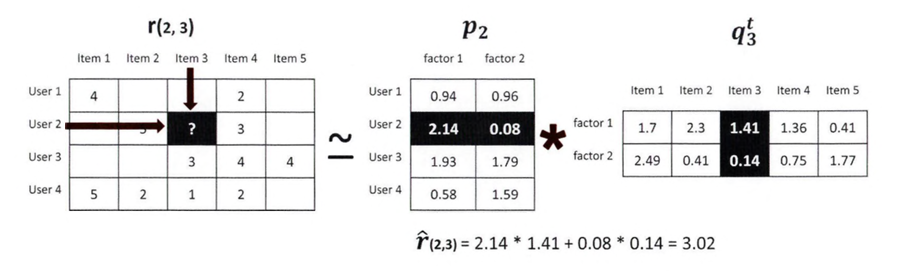
> 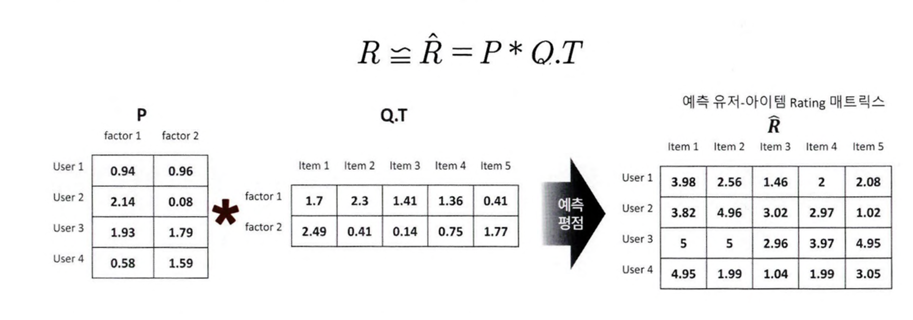

    - 행렬 분해는 주로 SVD(Singular Value Decomposition) 방식 이용
        - 하지만, Null 값이 없는 행렬에만 적용 가능 -> 이 경우 SGD(확률적 경사 하강법)이나 ALS(Alternating Least Squares) 사용

##### **확률적 경사 하강법을 이용한 행렬 분해**

1. P와 Q를 임의의 값을 가진 행렬로 설정합니다.
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산합니다.
3. **이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트합니다.**
4. 만족할 만한 오류 값을 가질 때까지 2, 3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화합니다.

### **[필사]**

#### **04 잠재 요인 협업 필터링**

##### **확률적 경사 하강법을 이용한 행렬 분해**

In [59]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P,Q 초기화, 잠재 요인 차원 K=3으로 설정
R = np.array([[4, np.nan, np.nan, 2, np.nan],
              [np.nan, 5, np.nan, 3, 1],
              [np.nan, np.nan, 3, 4, 4],
              [5, 2, 1, 2, np.nan]])
num_users, num_items = R.shape
K = 3

# P,Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [61]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P, Q.T 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [63]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]

steps = 1000 # SGD를 반복해서 업데이트할 횟수
learning_rate = 0.01 # SGD 학습률
r_lambda = 0.01 # L2 규제 계수

# SGD 기법으로 P,Q 계속 업데이트
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i, :], Q[j, :].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i, :] = P[i, :] + learning_rate * (eij * Q[j, :] - r_lambda * P[i, :])
    Q[j, :] = Q[j, :] + learning_rate * (eij * P[i, :] - r_lambda * Q[j, :])

    rmse = get_rmse(R, P, Q, non_zeros)
  if (step % 50) == 0:
    print("### iteration step: ", step, " rmse: ", rmse)

### iteration step:  0  rmse:  3.2388050277987723
### iteration step:  50  rmse:  0.4876723101369648
### iteration step:  100  rmse:  0.1564340384819247
### iteration step:  150  rmse:  0.07455141311978046
### iteration step:  200  rmse:  0.04325226798579314
### iteration step:  250  rmse:  0.029248328780878973
### iteration step:  300  rmse:  0.022621116143829466
### iteration step:  350  rmse:  0.019493636196525135
### iteration step:  400  rmse:  0.018022719092132704
### iteration step:  450  rmse:  0.01731968595344266
### iteration step:  500  rmse:  0.016973657887570753
### iteration step:  550  rmse:  0.016796804595895633
### iteration step:  600  rmse:  0.01670132290188466
### iteration step:  650  rmse:  0.01664473691247669
### iteration step:  700  rmse:  0.016605910068210026
### iteration step:  750  rmse:  0.016574200475705
### iteration step:  800  rmse:  0.01654431582921597
### iteration step:  850  rmse:  0.01651375177473524
### iteration step:  900  rmse:  0.016481465738

In [64]:
pred_matrix = np.dot(P, Q.T)
print("예측 행렬: \n", np.round(pred_matrix, 3))

예측 행렬: 
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
